In [1]:
!pip install alibi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of spacy[lookups] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 93.2 MB/s eta 0:00:00

In [1]:
# Now, try importing the necessary libraries again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from alibi.explainers import AnchorTabular # Uncommented this import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_train = pd.read_excel('/content/drive/MyDrive/HCC_MASLD/Merged_HCC (Train_Test) (version 1).xlsx', sheet_name = 'Train_mean')
df_train.describe()


,Age,Gender,Leucocytes,Platelets,INR,AST,ALT,Total_Bil,Dir_Bil,Albumin,Creatinine,HBsAg,HCVAb,AFP,AST_ALT_ratio,Obesity,Label_HCC
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,51.946565,0.763359,12.469447,224.936336,1.076967,49.937557,56.533053,24.762253,13.256931,40.351069,115.133527,0.332061,0.030534,367.398201,1.126299,0.244275,0.339695
std,14.360340,0.425834,82.044757,87.294284,0.206536,64.377500,133.629922,55.221291,22.288610,5.317456,510.280512,0.471854,0.172382,2234.936583,0.579079,0.430479,0.474512
min,17.000000,0.000000,2.200000,1.710000,0.840000,3.500000,5.300000,2.200000,1.200000,19.000000,17.680000,0.000000,0.000000,0.200000,0.097200,0.000000,0.000000
25%,41.000000,1.000000,5.500000,179.500000,0.970000,24.985000,25.167500,8.800000,5.500000,37.700000,67.350000,0.000000,0.000000,3.847750,0.723700,0.000000,0.000000
50%,53.000000,1.000000,6.500000,224.500000,1.030000,32.525000,36.000000,11.750000,8.050000,41.260000,78.100000,0.000000,0.000000,4.161169,0.952850,0.000000,0.000000
75%,63.000000,1.000000,8.097500,270.000000,1.117500,52.000000,54.150000,17.275000,13.000000,44.175000,90.300000,1.000000,0.000000,6.337500,1.403100,0.000000,1.000000
max,82.000000,1.000000,1329.000000,561.000000,3.140000,840.000000,2097.000000,491.000000,209.700000,53.020000,8307.000000,1.000000,1.000000,27806.660000,3.566000,1.000000,1.000000


In [5]:
df_test = pd.read_excel('/content/drive/MyDrive/HCC_MASLD/Merged_HCC (Train_Test) (version 1).xlsx', sheet_name = 'Test_mean')
df_test.describe()

,Age,Gender,Leucocytes,Platelets,INR,AST,ALT,Total_Bil,Dir_Bil,Albumin,Creatinine,HBsAg,HCVAb,AFP,AST_ALT_ratio,Obesity,Label_HCC
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,43.045802,0.480916,7.085497,250.472519,0.996619,27.788550,30.444733,12.155485,8.448550,42.363817,79.518244,0.106870,0.015267,867.404358,1.204076,0.114504,0.099237
std,12.602724,0.501554,2.324677,57.861118,0.071549,27.062188,39.161991,10.100742,4.255425,3.789334,28.931151,0.310134,0.123084,8969.097066,0.525859,0.319645,0.300127
min,18.000000,0.000000,3.600000,2.900000,0.840000,7.560000,4.900000,1.700000,0.800000,20.200000,46.000000,0.000000,0.000000,0.600000,0.177200,0.000000,0.000000
25%,34.000000,0.000000,5.600000,207.500000,0.950000,18.520000,13.360000,7.700000,5.500000,40.500000,63.460000,0.000000,0.000000,4.161169,0.870350,0.000000,0.000000
50%,42.000000,0.000000,6.500000,249.000000,0.990000,22.430000,20.800000,9.790000,7.200000,42.840000,75.440000,0.000000,0.000000,4.161169,1.146400,0.000000,0.000000
75%,51.000000,1.000000,8.020000,282.500000,1.040000,28.700000,32.020000,12.650000,10.300000,44.510000,89.755000,0.000000,0.000000,4.161169,1.391900,0.000000,0.000000
max,80.000000,1.000000,16.750000,465.000000,1.240000,296.000000,398.000000,99.800000,25.000000,53.620000,348.860000,1.000000,1.000000,102458.000000,3.087000,1.000000,1.000000


In [7]:
df_train.columns

Index(['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb',
       'AFP', 'AST_ALT_ratio', 'Obesity', 'Label_HCC'],
      dtype='object')

In [8]:
columns = ['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb',
       'AFP', 'AST_ALT_ratio', 'Obesity']
selected_columns = ['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb',
       'AFP', 'AST_ALT_ratio', 'Obesity']

In [9]:
data_train = df_train.copy()
data_test = df_test.copy()

In [10]:
X_train = data_train[selected_columns]
y_train = data_train.Label_HCC
X_test = data_test[selected_columns]
y_test = data_test.Label_HCC

In [11]:
X_train.columns

Index(['Age', 'Gender', 'Leucocytes', 'Platelets', 'INR', 'AST', 'ALT',
       'Total_Bil', 'Dir_Bil', 'Albumin', 'Creatinine', 'HBsAg', 'HCVAb',
       'AFP', 'AST_ALT_ratio', 'Obesity'],
      dtype='object')

1. Model training and prediction

L1: {'classify__criterion': 'entropy', 'classify__max_depth': 5, 'classify__max_features': 'sqrt', 'classify__n_estimators': 50} 0.932


In [12]:
model = XGBClassifier( learning_rate = 0.07,max_depth = 4,min_child_weight = 1,  n_estimators=150, random_state = 42)

# B2: Huấn luyện mô hình
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.07, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [13]:
import shap

In [14]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1,-1)
model.predict(data_for_prediction_array)

array([0])

In [15]:
print("model coeficients:\n")
for i in range(X_train.shape[1]):
  print(X_train.columns[i], "=", model.feature_importances_[i].round(5))

model coeficients:

Age = 0.08673
Gender = 0.01925
Leucocytes = 0.02322
Platelets = 0.04777
INR = 0.09653
AST = 0.04199
ALT = 0.05762
Total_Bil = 0.09344
Dir_Bil = 0.02281
Albumin = 0.01793
Creatinine = 0.01213
HBsAg = 0.07024
HCVAb = 0.0
AFP = 0.38742
AST_ALT_ratio = 0.02292
Obesity = 0.0


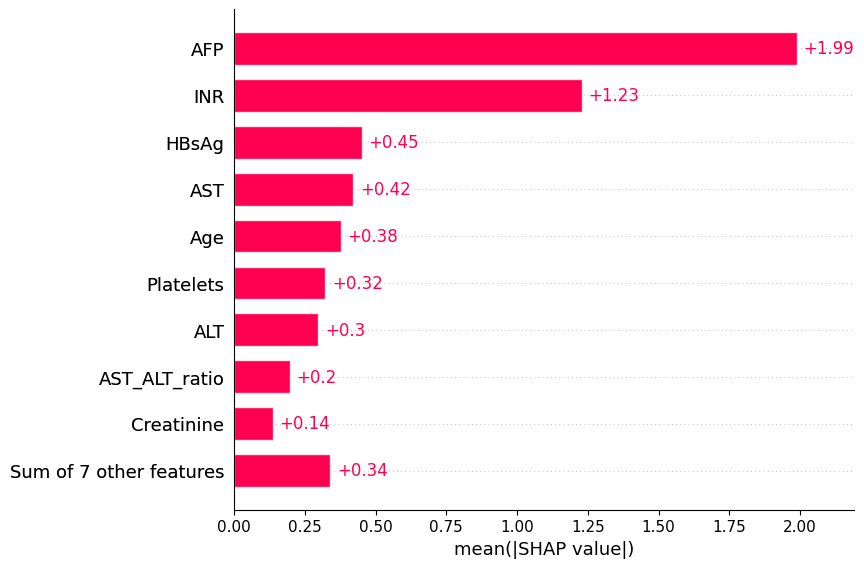

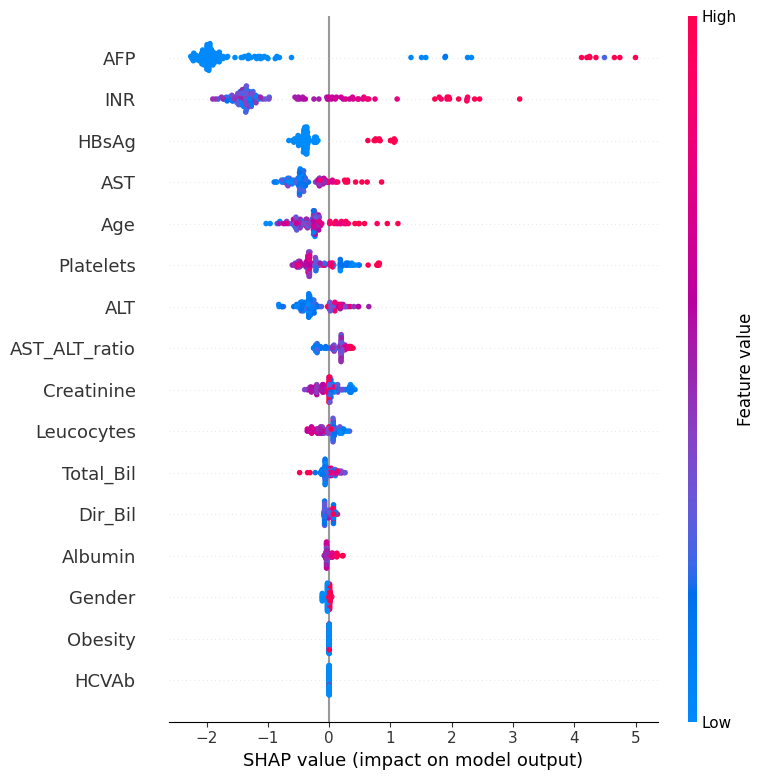

In [18]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.plots.bar(shap_values)
shap.summary_plot(shap_values, X_test)